In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import seaborn as sns

In [4]:
data=pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
data=data.drop(columns=['State'])
data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [6]:
data=data.rename({'R&D Spend':'RD','Marketing Spend':'Marketing'},axis=1)

In [7]:
data

,RD,Administration,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [8]:
data.isna().sum()

RD                0
Administration    0
Marketing         0
Profit            0
dtype: int64

In [9]:
data.corr()

,RD,Administration,Marketing,Profit
RD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot of the variables with Histogram

C:\Users\MD SUFIYA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


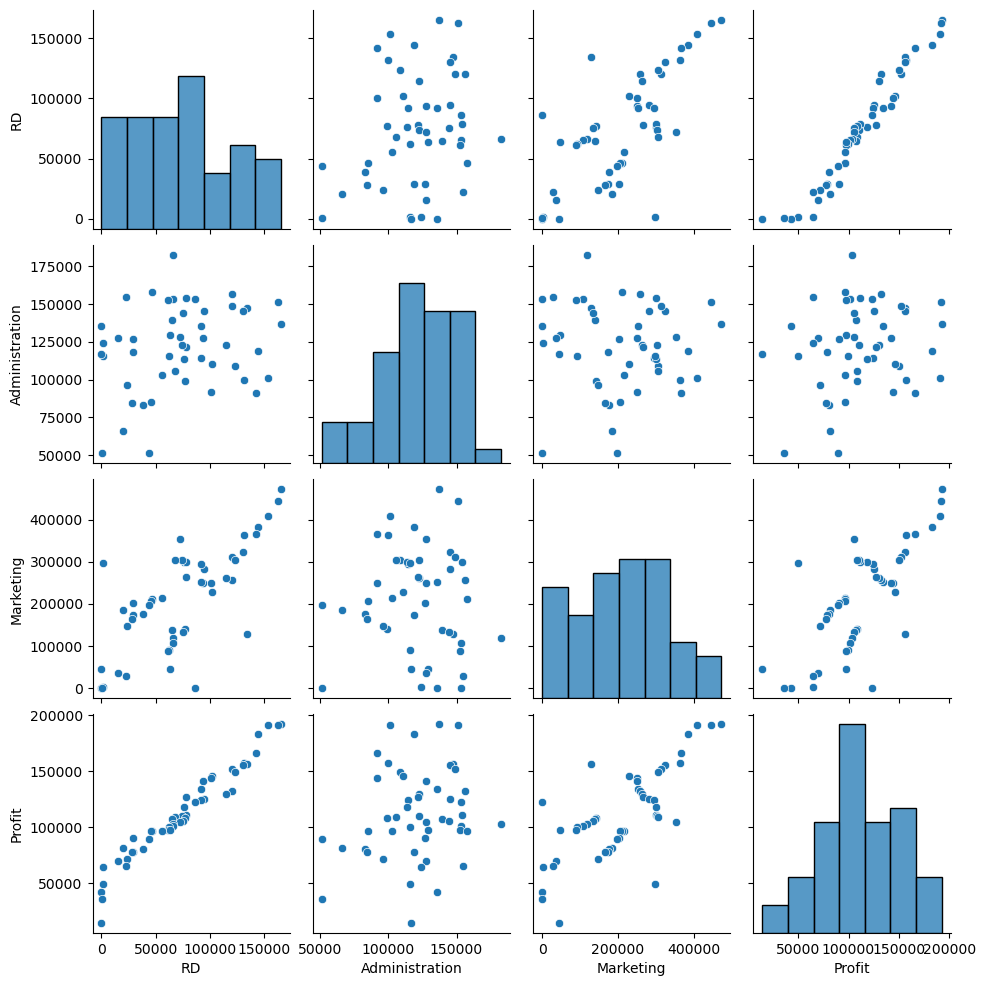

In [10]:
sns.pairplot(data)

# Preparing a model

In [11]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~RD+Administration+Marketing',data=data).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           4.53e-30
Time:                        11:55:34   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#Coefficients
model.params

Intercept         50122.192990
RD                    0.805715
Administration       -0.026816
Marketing             0.027228
dtype: float64

In [14]:
#pvalues and t values
model.pvalues,model.tvalues

(Intercept         1.057379e-09
 RD                2.634968e-22
 Administration    6.017551e-01
 Marketing         1.047168e-01
 dtype: float64,
 Intercept          7.626218
 RD                17.846374
 Administration    -0.525507
 Marketing          1.655077
 dtype: float64)

In [15]:
#rsquared and adj r squared values
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression

In [16]:
model1=smf.ols('Profit~RD',data=data).fit()
print(model1.pvalues,model1.tvalues)

Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64 Intercept    19.320288
RD           29.151139
dtype: float64


In [17]:
model2=smf.ols('Profit~Administration',data=data).fit()
print(model2.pvalues,model2.tvalues)

Intercept         0.003824
Administration    0.162217
dtype: float64 Intercept         3.040044
Administration    1.419493
dtype: float64


In [18]:
model3=smf.ols('Profit~Marketing',data=data).fit()
model3.pvalues,model3.tvalues

(Intercept    4.294735e-10
 Marketing    4.381073e-10
 dtype: float64,
 Intercept    7.808356
 Marketing    7.802657
 dtype: float64)

# Calculating VIF

In [19]:
rsq_rd = smf.ols('RD~Administration+Marketing',data=data).fit().rsquared
vif_rd = 1/(1-rsq_rd)

rsq_Admin = smf.ols('Administration~RD+Marketing',data=data).fit().rsquared
vif_Admin = 1/(1-rsq_Admin)

rsq_Market = smf.ols('Marketing~Administration+RD',data=data).fit().rsquared
vif_Market = 1/(1-rsq_Market)

#storing vif values in a dataframe 
dataframe={'Variables':['RD','Administration','Marketing'],'VIF':[vif_rd,vif_Admin,vif_Market]}
vif_dataframe=pd.DataFrame(dataframe)
vif_dataframe

,Variables,VIF
0,RD,2.468903
1,Administration,1.175091
2,Marketing,2.326773


# Residual Analysis- QQ Plot

Test for Normality of Residuals

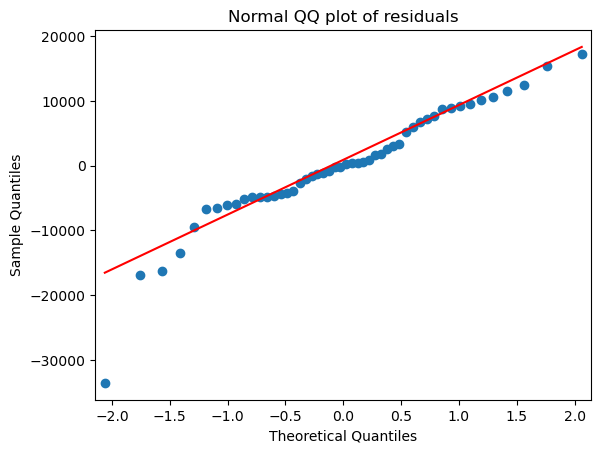

In [20]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal QQ plot of residuals')
plt.show()

In [21]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

# Residual Plot for Homoscedasticity

In [24]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

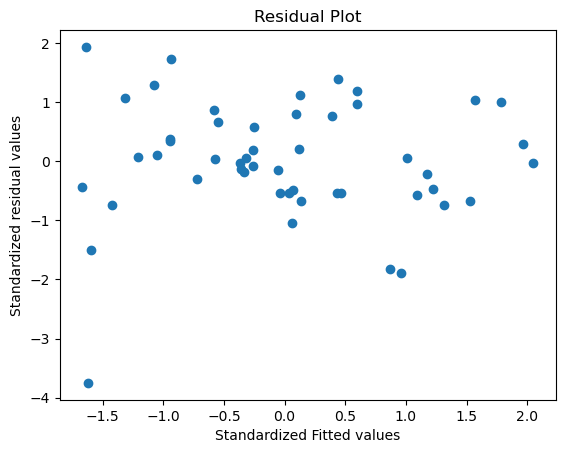

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residuals Vs Regressors

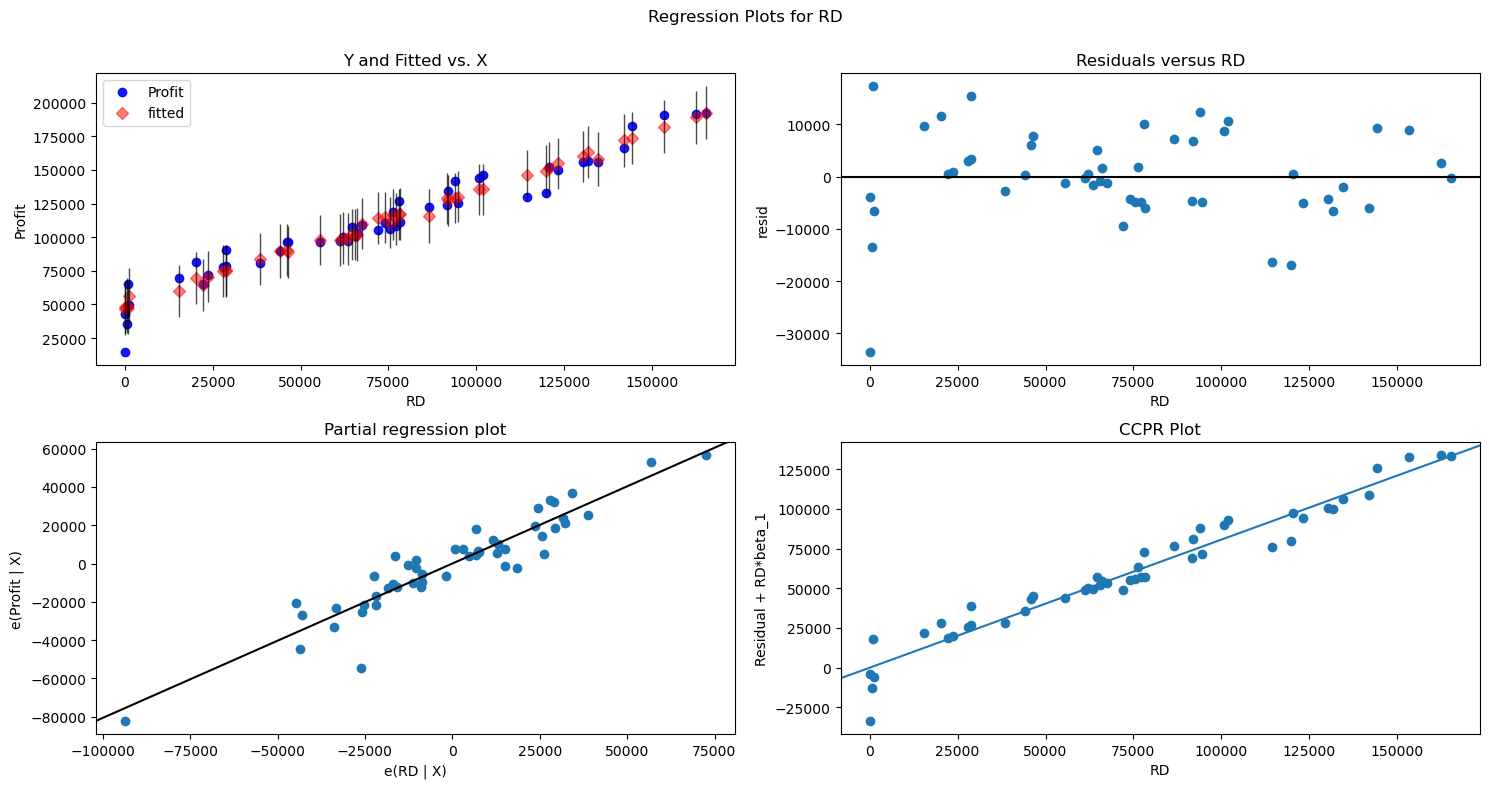

In [31]:
fig = plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, "RD" ,fig=fig)
plt.show()

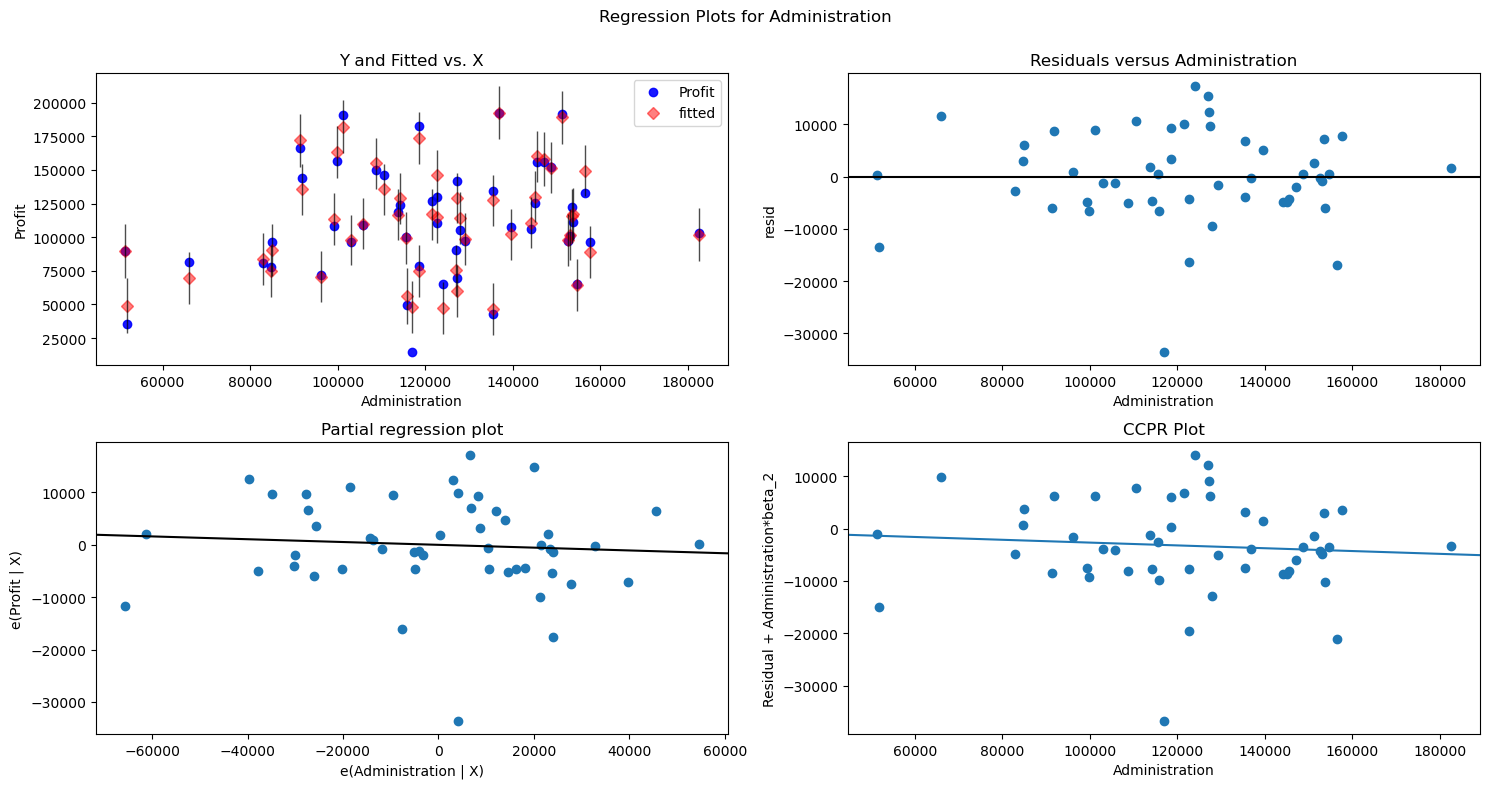

In [32]:
fig = plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, "Administration" ,fig=fig)
plt.show()

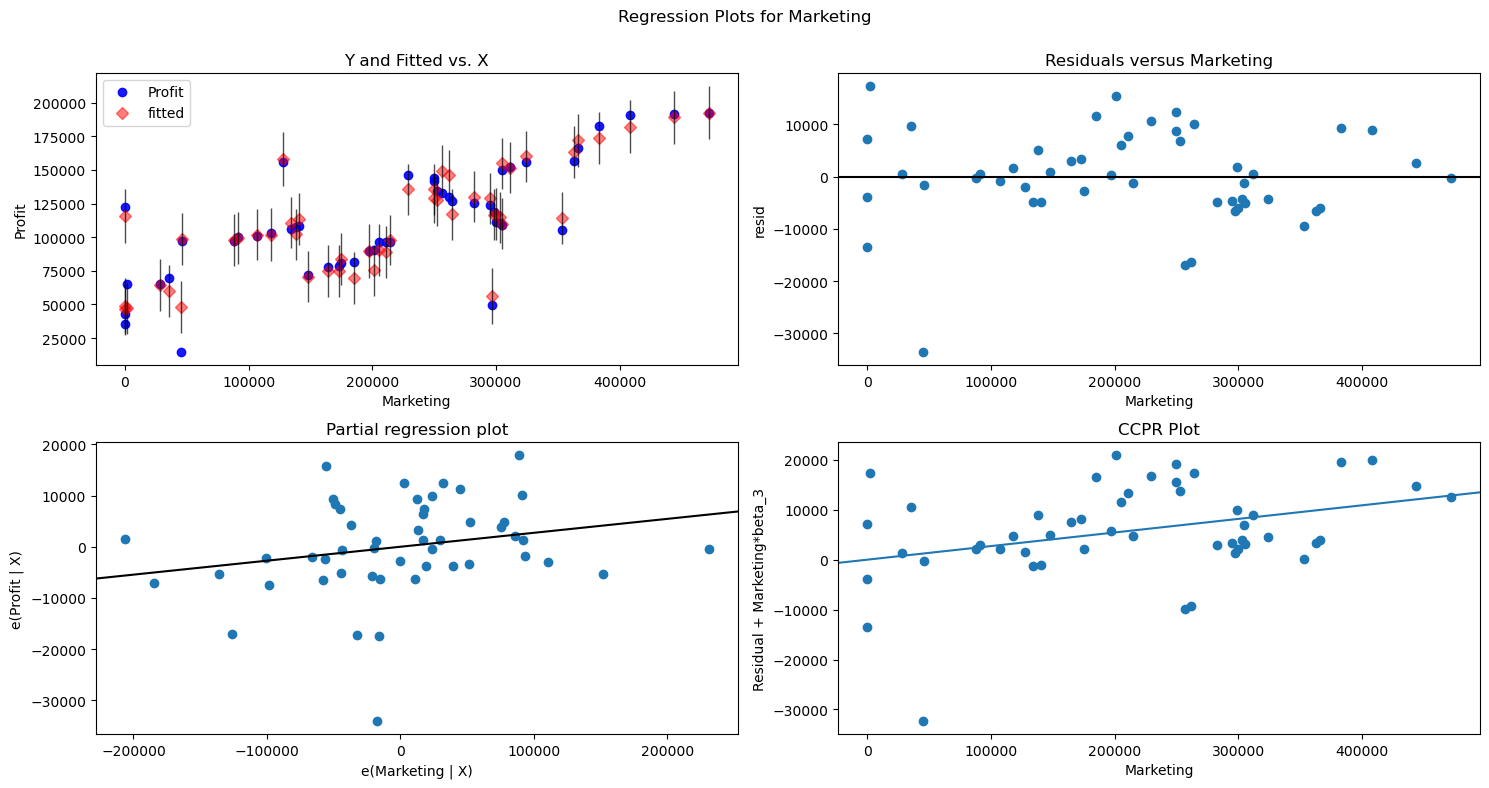

In [33]:
fig = plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, "Marketing" ,fig=fig)
plt.show()

# Model Deletion Diagnostics

# Deleting Outliers

# Cooks Distance

In [34]:
model_influence=model.get_influence()
(c, _) = model_influence.cooks_distance

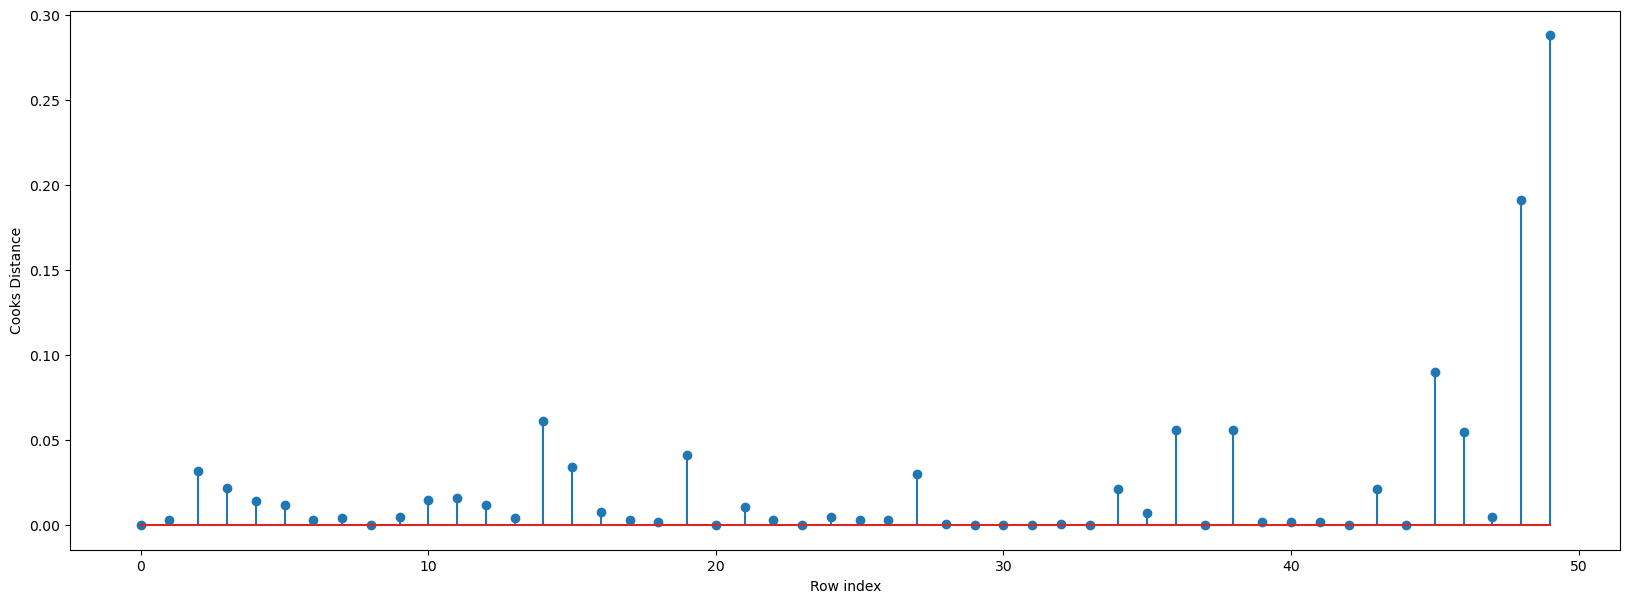

In [35]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

#  High Influence Points

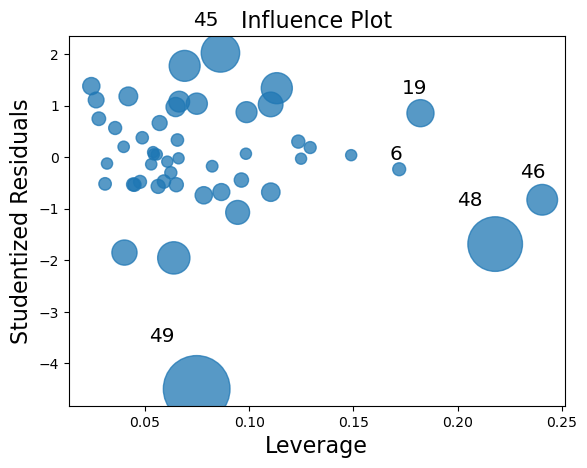

In [37]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

From the above plot we can say that 49th and 48th observation are influencers

In [38]:
data[data.index.isin([48,49])]

,RD,Administration,Marketing,Profit
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [39]:
#Improving the model

In [50]:
#data_new=pd.read_csv('50_Startups.csv')
#data=data.drop(columns=['State'])
#data=data.rename({'R&D Spend':'RD','Marketing Spend':'Marketing'},axis=1)
datanew=data.drop(data.index[[48,49]],axis=0)

In [51]:
datanew

,RD,Administration,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Build Model

In [55]:
final_model2=smf.ols('Profit~RD+Marketing',data=datanew).fit()
final_model2.rsquared,final_model2.aic

(0.9609119875752479, 994.886442942941)

In [56]:
final_model3=smf.ols('Profit~RD+Administration',data=datanew).fit()
final_model3.rsquared,final_model3.aic

(0.9613542664192156, 994.3402293693792)

In [57]:
final_model4=smf.ols('Profit~Marketing+Administration',data=datanew).fit()
final_model4.rsquared,final_model4.aic

(0.5625802937857887, 1110.8101546830774)

Comparing the rsquared and aic in both the models,the high rsquared value and low aic value tends to a better model
So we use final_model3 as the best model

# Cooks Distance

In [58]:
model_influence_rda = final_model3.get_influence()
(c_rda, _) = model_influence_rda.cooks_distance

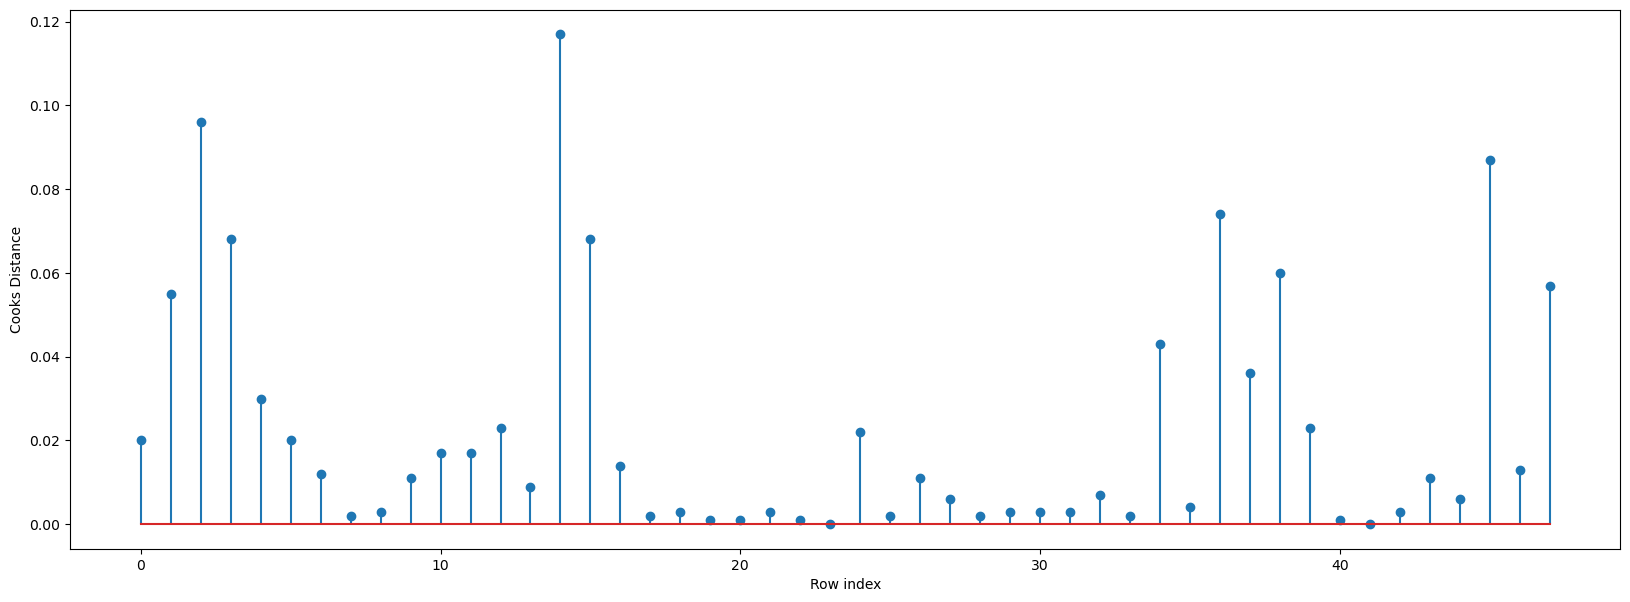

In [59]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(datanew)),np.round(c_rda,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [60]:
(np.argmax(c_rda),np.max(c_rda))

(14, 0.11654464976722198)

since it has the least value so we can stop dropping process here.

# Predicting for new data

In [61]:
new_data=pd.DataFrame({'RD':540,'Administration':789,'Marketing':500},index=[1])

In [63]:
final_model3.predict(new_data)

1    63113.012167
dtype: float64

In [64]:
pred_y=final_model3.predict(datanew)

In [65]:
pred_y

0     187340.464760
1     183863.887641
2     180534.893139
3     171604.420272
4     172024.525403
5     162900.562346
6     161186.859951
7     157773.804230
8     149478.810965
9     155129.052073
10    137340.484516
11    137893.497963
12    129316.175141
13    127091.776815
14    148330.209061
15    146711.212589
16    116751.658144
17    128482.338848
18    128676.601621
19    120997.283316
20    115951.175950
21    114367.406052
22    113345.516501
23    109453.840824
24    117822.625592
25    104263.757333
26    112655.711034
27    111367.236568
28    101797.017449
29    103909.390855
30    104068.445347
31    100259.360216
32    104095.492902
33     99772.679489
34     87736.121850
35     93479.452221
36     75684.497649
37     94706.610663
38     73860.287242
39     87517.154120
40     76471.551735
41     78595.585990
42     74135.495344
43     64829.306456
44     68023.684692
45     53162.943051
46     54120.360089
47     51395.923989
dtype: float64